In [27]:
"""
Script responsável pela criação das figuras de plot

"""


'\nScript responsável pela criação das figuras de plot\n\n'

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import argparse
import os

In [29]:
plot_1 = {
    "Datasets": ["Kronodroid E", "Kronodroid R"],
    "Acurácia TS-Ar": [],
    "Acurácia TR-As": [],
    "Precisão TS-Ar": [],
    "Precisão TR-As": [],
}

plot_2 = {
    "Datasets": ["Kronodroid E", "Kronodroid R"],
    "Pontuação F1 TS-Ar": [],
    "Pontuação F1 TR-As": [],
    "Recall TS-Ar": [],
    "Recall TR-As": []
}

plot_3 = {
    "Datasets": ["KronoDroid E", "KronoDroid R"],
    "Acurácia TS-Ar": [],
    "Acurácia TR-As": [],
    "Precisão TS-Ar": [],
    "Precisão TR-As": [],
    "Pontuação F1 TR-As": [],
    "Pontuação F1 TS-Ar": [],
    "Recall TS-Ar": [],
    "Recall TR-As": []
}

In [30]:
def plot_and_save_as_pdf(data, plot_name='plots',figsize=(12, 6),start_color=0):
    """
    Função de plot e salavemnto em figuras
    
    Parâmetros:
    - data: dados no formato csv
    - plot_name: nome do plot
    - figsize: tamanho da figura
    - start_color: cor inicial da figura
    
    """
    palette_color = sns.color_palette("Paired")
    palette_color = palette_color[start_color:] + palette_color[:start_color]
    # Create a DataFrame
    df = pd.DataFrame(data)
    print()
    # Melt the DataFrame
    df_melted = df.melt(id_vars="Datasets", var_name="Métrica", value_name="Valor")
   
    # Plotting
    plt.figure(figsize=figsize)
    ax = sns.barplot(x="Datasets", y="Valor", hue="Métrica", data=df_melted, palette=palette_color)

    # Set y-axis limit
    ax.set_ylim(0.0, 1)

    # Rotate x-axis labels to avoid overlap
   

    # Annotate bars with values inside the bar, on top


    for p in ax.patches:
        height = p.get_height()
        
        if(height>0):
         ax.annotate(format(height, '.2f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, -9), 
                    textcoords='offset points',
                    color='black',rotation=90)


    # Handle legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_labels.append(label)
            unique_handles.append(handle)
    ax.legend(unique_handles, unique_labels, title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
      

    plt.tight_layout()

    # Save plot as PDF
    plt.savefig(f"{plot_name}.pdf", format="pdf", dpi=96)
    plt.savefig(f"{plot_name}_2.pdf", format="pdf")
    # Show plot
    plt.show()

In [31]:
def reading_function(files):
 dict_params={'TSTR Mean Accuracy:':[],'TS_Ar Mean Accuracy:':[],'TSTR Mean Precision:':[],'TS_Ar Mean Precision:':[],'TSTR Mean Recall:':[],'TS_Ar Mean Recall:':[],'TSTR Mean F1 Score:':[],'TS_Ar Mean F1 Score:':[],'TRTS Mean Accuracy:':[],"TR_As Mean Accuracy:":[],'TRTS Mean Precision:':[],'TR_As Mean Precision:':[],'TRTS Mean Recall:':[],'TR_As Mean Recall:':[],'TRTS Mean F1 Score:':[],'TR_As Mean F1 Score:':[]}
 strings_to_search=['Overall TSTR Results: RandomForest','Overall TRTS Results: Classifier RandomForest','Overall TR_As Results: Classifier RandomForest','Overall TS_Ar Results: Classifier','Overall TS_Ar Results: RandomForest']
 params_to_seach=['TSTR Mean Accuracy:','TS_Ar Mean Accuracy:','TSTR Mean Precision:','TS_Ar Mean Precision:','TSTR Mean Recall:','TS_Ar Mean Recall:','TSTR Mean F1 Score:','TS_Ar Mean F1 Score:','TRTS Mean Accuracy:',"TR_As Mean Accuracy:",'TRTS Mean Precision:','TR_As Mean Precision:','TRTS Mean Recall:','TR_As Mean Recall:','TRTS Mean F1 Score:','TR_As Mean F1 Score:']
 next_lines=5
 for file_name in files:
    with open(file_name, 'r') as read_obj:
        # Read all lines in the file one by one
        for line in read_obj:
            # For each line, check if it contains the string
            for word in strings_to_search:
                if word in line:
                   next_lines=0
            if next_lines<4:
               for param in params_to_seach: 
                    if param in line:
                        print(param)
                        dict_params[param].append(( float(line.split(":")[3])))
                        next_lines=next_lines+1
    # Return list of tuples containing line numbers and lines where string is found
 return dict_params

TRTS Mean Accuracy:
TRTS Mean Precision:
TRTS Mean Recall:
TRTS Mean F1 Score:
TSTR Mean Accuracy:
TSTR Mean Precision:
TSTR Mean Recall:
TSTR Mean F1 Score:
TRTS Mean Accuracy:
TRTS Mean Precision:
TRTS Mean Recall:
TRTS Mean F1 Score:
TSTR Mean Accuracy:
TSTR Mean Precision:
TSTR Mean Recall:
TSTR Mean F1 Score:
{'Datasets': ['KronoDroid E', 'KronoDroid R'], 'Acurácia TS-Ar': [0.857, 0.8886000000000001], 'Acurácia TR-As': [0.9237, 0.8919499999999999], 'Precisão TS-Ar': [0.8021693988569659, 0.8649307753816231], 'Precisão TR-As': [0.9632679848028756, 0.9480145049858544], 'Pontuação F1 TR-As': [0.9202644642022036, 0.8847262750157723], 'Pontuação F1 TS-Ar': [0.870408833214837, 0.8922097789854678], 'Recall TS-Ar': [0.9530999999999998, 0.9215], 'Recall TR-As': [0.8811, 0.8293999999999999]}



/tmp/ipykernel_21733/1648225484.py:22: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  ax = sns.barplot(x="Datasets", y="Valor", hue="Métrica", data=df_melted, palette=palette_color)


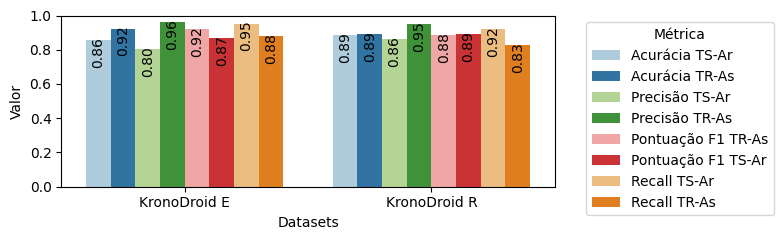

In [32]:
# Call the function to create and save the plot
if(os.path.exists('campanhas_SF24/')):
 files=['campanhas_SF24/kronodroid_real_device-balanced.csv/logging.log','campanhas_SF24/kronodroid_emulador-balanced.csv/logging.log']
else: 
    
 print('ye')
 files=['Campanhas_SF24/kronodroid_real_device-balanced.csv/logging.log','Campanhas_SF24/kronodroid_emulador-balanced.csv/logging.log']
dict_params=reading_function(files)
if dict_params['TSTR Mean Accuracy:']:
    plot_1['Acurácia TS-Ar']=dict_params['TSTR Mean Accuracy:']
    plot_3['Acurácia TS-Ar']=dict_params['TSTR Mean Accuracy:']
    plot_1["Acurácia TR-As"]=dict_params['TRTS Mean Accuracy:']
    plot_3["Acurácia TR-As"]=dict_params['TRTS Mean Accuracy:']
    plot_1["Precisão TS-Ar"]=dict_params['TSTR Mean Precision:']
    plot_3["Precisão TS-Ar"]=dict_params['TSTR Mean Precision:']
    plot_1["Precisão TR-As"]=dict_params['TRTS Mean Precision:']
    plot_3["Precisão TR-As"]=dict_params['TRTS Mean Precision:']
    plot_2["Pontuação F1 TS-Ar"]=dict_params['TSTR Mean F1 Score:']
    plot_3["Pontuação F1 TS-Ar"]=dict_params['TSTR Mean F1 Score:']
    plot_2["Pontuação F1 TR-As"]=dict_params['TRTS Mean F1 Score:']
    plot_3["Pontuação F1 TR-As"]=dict_params['TRTS Mean F1 Score:']
    plot_2["Recall TS-Ar"]=dict_params['TSTR Mean Recall:']
    plot_3["Recall TS-Ar"]=dict_params['TSTR Mean Recall:']
    plot_2["Recall TR-As"]=dict_params['TRTS Mean Recall:']
    plot_3["Recall TR-As"]=dict_params['TRTS Mean Recall:']
else: 
    plot_1['Acurácia TS-Ar']=dict_params['TS_Ar Mean Accuracy:']
    plot_3['Acurácia TS-Ar']=dict_params['TS_Ar Mean Accuracy:']
    plot_1["Acurácia TR-As"]=dict_params["TR_As Mean Accuracy:"]
    plot_3["Acurácia TR-As"]=dict_params["TR_As Mean Accuracy:"]
    plot_1["Precisão TS-Ar"]=dict_params['TS_Ar Mean Precision:']
    plot_3["Precisão TS-Ar"]=dict_params['TS_Ar Mean Precision:']
    plot_1["Precisão TR-As"]=dict_params['TR_As Mean Precision:']
    plot_3["Precisão TR-As"]=dict_params['TR_As Mean Precision:']
    plot_2["Pontuação F1 TS-Ar"]=dict_params['TS_Ar Mean F1 Score:']
    plot_3["Pontuação F1 TS-Ar"]=dict_params['TS_Ar Mean F1 Score:']
    plot_2["Pontuação F1 TR-As"]=dict_params['TR_As Mean F1 Score:']
    plot_3["Pontuação F1 TR-As"]=dict_params['TR_As Mean F1 Score:']
    plot_2["Recall TS-Ar"]=dict_params['TS_Ar Mean Recall:']
    plot_3["Recall TS-Ar"]=dict_params['TS_Ar Mean Recall:']
    plot_2["Recall TR-As"]=dict_params['TR_As Mean F1 Score:']
    plot_3["Recall TR-As"]=dict_params['TR_As Mean F1 Score:']

print(plot_3)
plot_and_save_as_pdf(data=plot_3, plot_name='plot_3-v2', figsize=(8, 2.5), start_color=0)
